### Components of Time Series

While analyzing a time series for modeling, there are a few points that you
will need to observe carefully. These are the components of a time series
which may be classified into the following categories:

1. General trends
2. Seasonal movements
3. Cyclical movements
4. Noise (irregular fluctuations)

#### Univariate vs. Multivariate TimeSeries

#### Univariate
- A single variable measured over time is called a univariate time series.
For example, the consumption of electricity in your home measured
over a period of one year is considered a univariate time series
- Such
time series are best modeled using statistical techniques, such as
autoregressive moving average (ARMA). 
- As the name suggests, it combines
autoregression techniques with moving average techniques to forecast
those future values.
- It assumes that the previous observations are good
predictors of future values

#### Multivariate
- A multivariate time series has more than one time-dependent variable.
Thus, the resultant not merely depends on the past values of the multiple
variables but is also a function of interdependencies between them.
-  A
well-known statistical technique for modeling a multivariate time series
is the vector autoregression (VAR) model. The model assumes that each
variable is a function of the past values of itself and also the past values of
all correlated variables.
- An example of a multivariate time series would be
air pollution which depends on several interdependent components

### Univariate Time Series Analysis

# Energy Consumption Forecasting

### Loading Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score

### Loading and Preparing Data

- we will be using a dataset which is available in Kaggle 
- The dataset
provided by PJM Interconnection LLC consists of over 10 years of hourly
energy consumption expressed in megawatts.
- https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption

In [2]:
df = pd.read_csv('DOM_hourly.csv')

In [3]:
df

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0
...,...,...
116184,2018-01-01 20:00:00,18418.0
116185,2018-01-01 21:00:00,18567.0
116186,2018-01-01 22:00:00,18307.0
116187,2018-01-01 23:00:00,17814.0


 - The data contains more than 100,000 energy readings. The readings
are spaced out every hour. The data starts in 2005 and is recorded up
to January 2018.

`this is for days comment the line below if you want to apply it on hours`

In [4]:
df = df[df['Datetime'].str.contains('00:00:00')] # this is for days comment this if you want to apply it on hours

In [5]:
# df_daily

Create an index on the datetime field. Creating an index makes the
datetime column be treated as date rather than an object.

In [6]:
df['Datetime'] = pd.to_datetime(df.Datetime ,format = '%Y-%m-%d %H:%M:%S')
df.index = df.Datetime
df.drop(['Datetime'], axis = 1,inplace = True)

C:\Users\nisam\AppData\Local\Temp\ipykernel_26708\3817181363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df.Datetime ,format = '%Y-%m-%d %H:%M:%S')
C:\Users\nisam\AppData\Local\Temp\ipykernel_26708\3817181363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Datetime'], axis = 1,inplace = True)


In [7]:
df.head()

,DOM_MW
Datetime,
2006-01-01,9649.0
2005-12-31,9945.0
2005-12-30,9521.0
2005-12-29,9045.0
2005-12-28,10493.0


In [8]:
#checking missing data
df.isna().sum()

DOM_MW    0
dtype: int64

#### You can see the energy consumption trend by plotting the energy consumption vs. the time

In [9]:
df.index


DatetimeIndex(['2006-01-01', '2005-12-31', '2005-12-30', '2005-12-29',
               '2005-12-28', '2005-12-27', '2005-12-26', '2005-12-25',
               '2005-12-24', '2005-12-23',
               ...
               '2018-01-11', '2018-01-10', '2018-01-09', '2018-01-08',
               '2018-01-07', '2018-01-06', '2018-01-05', '2018-01-04',
               '2018-01-03', '2018-01-02'],
              dtype='datetime64[ns]', name='Datetime', length=4841, freq=None)

In [10]:
'2005-12-31 00:00:00' in df.index

True

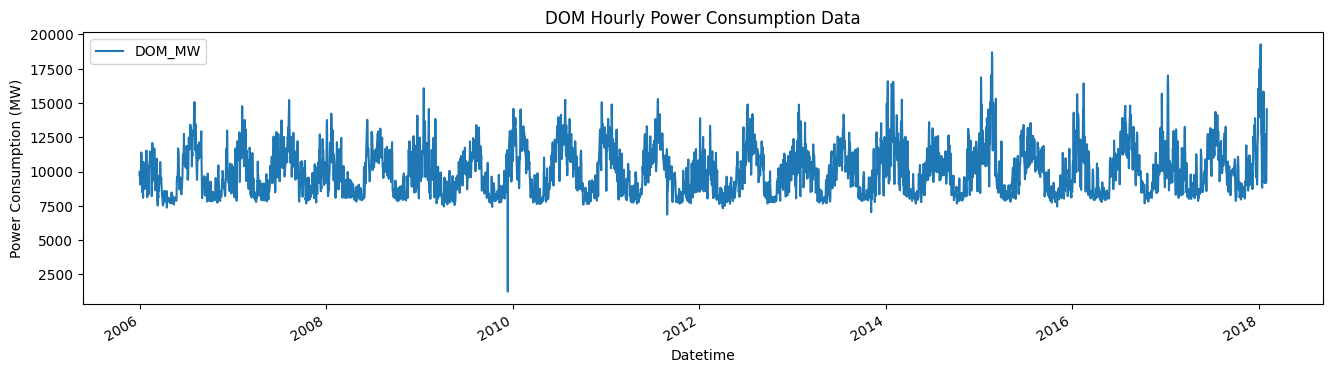

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your index is a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Sort the index to allow slicing
df = df.sort_index()

# Define the date range
a = '2005-12-31 00:00:00'
b = '2018-01-31 00:00:00'

# Slice the DataFrame and plot
try:
    df.loc[a:b].plot(figsize=(16, 4), legend=True)
    plt.title('DOM Hourly Power Consumption Data')
    plt.ylabel('Power Consumption (MW)')
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}")
    print("Ensure that the date range exists in the index.")


- We can see that the consumption trend follows almost a
uniform pattern over the entire period. In time analysis, it is important to
observe seasonal changes in the pattern

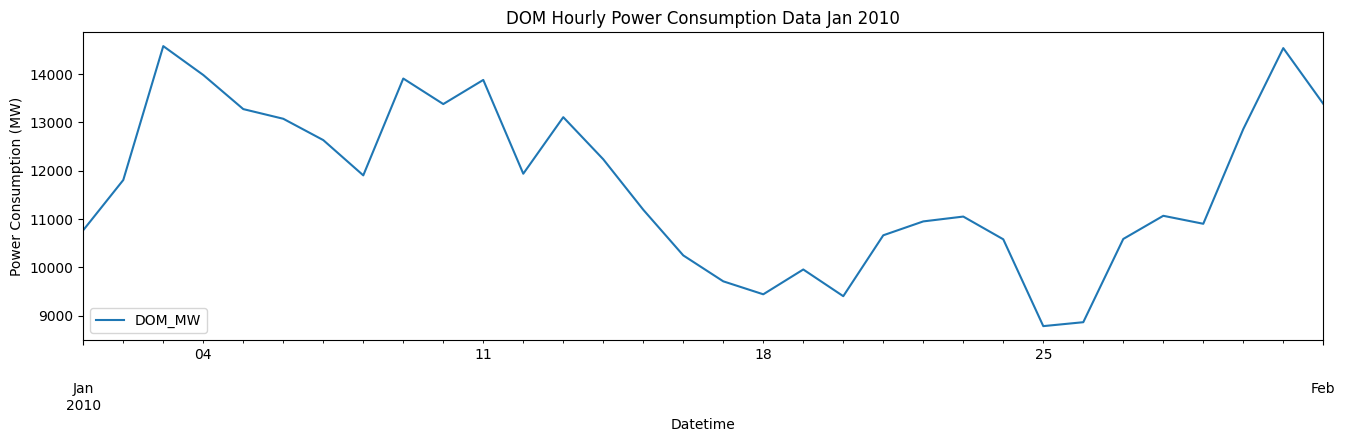

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your index is a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Sort the index to allow slicing
df = df.sort_index()

# Define the date range
a = '2010-01-01 00:00:00'
b = '2010-02-01 00:00:00'

# Slice the DataFrame and plot
try:
    df.loc[a:b].plot(figsize=(16, 4), legend=True)
    plt.title('DOM Hourly Power Consumption Data Jan 2010')
    plt.ylabel('Power Consumption (MW)')
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}")
    print("Ensure that the date range exists in the index.")


- After observing the trend, say, the aim is to predict energy
consumption for the first two weeks of February 2018.
- So, we need to
create a model that is trained on this huge amount of data spanning over
13 years.

- Before we input this data to our model for training, the data needs to
be normalized in the range 0 to +1

In [13]:
scaler = sklearn.preprocessing.MinMaxScaler()
df['DOM_MW'] = scaler.fit_transform(df['DOM_MW'].values.reshape(-1,1))

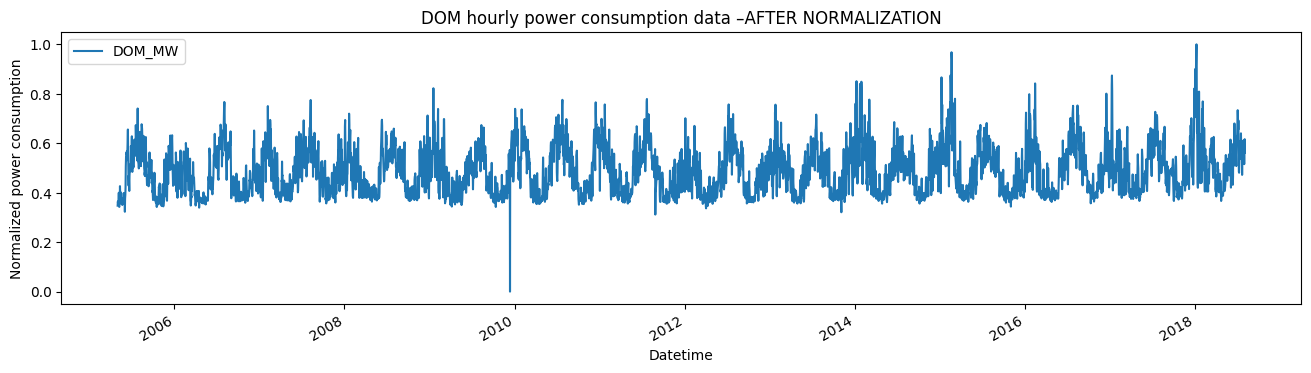

In [14]:
df.plot(figsize = (16,4), legend = True)
plt.title('DOM hourly power consumption data –AFTER NORMALIZATION')
plt.ylabel('Normalized power consumption')
plt.show()

Note that all y values now range in 0 to +1.

### Creating Training/Testing Datasets

- To create the training dataset, we need to create sequences in the entire
dataset. 
- Suppose we define the sequence length of 20, then the first 20 data
points will be our first sequence, and the 21st point will be our target value.
- The next sequence will be from 1 to 21, and the 22nd will become the
target, and so on.

### 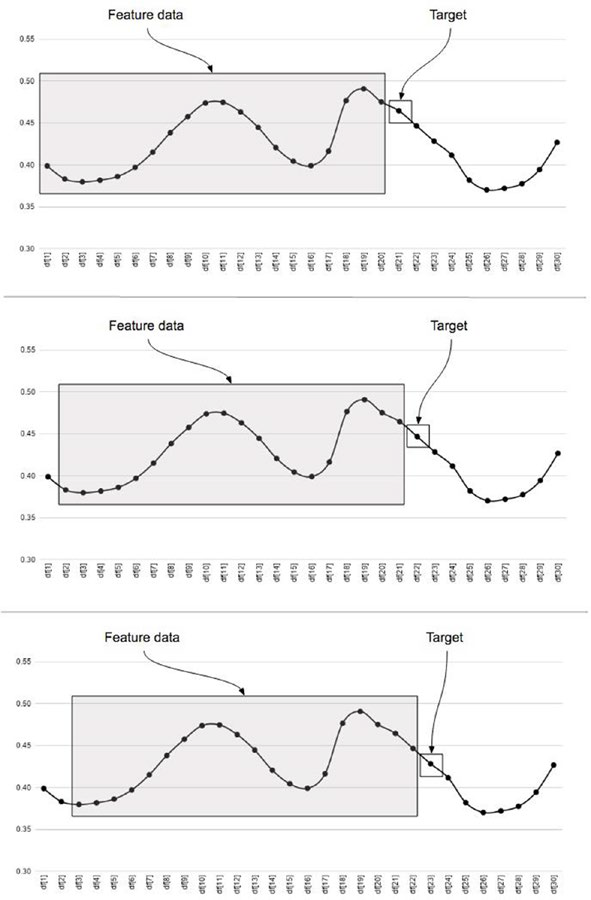

- We have 116,189 data points in our dataset. We will use the first 90%
data points for training and the remaining for testing

In [15]:
# def load_data(stock,seq_len):
    # X_train = []
    # y_train = []
    # for i in range(seq_len,len(stock)):
    #     X_train.append(stock.iloc[i-seq_len:i,0])
    #     y_train.append(stock.iloc[i,0])

    # X_test = X_train[int(0.9*(len(stock)))]
    # y_test = y_train[int(0.9*(len(stock)))]
    
    # X_train = X_train[:int(0.9*(len(stock)))]
    # y_train = y_train[:int(0.9*(len(stock)))]

    # #convert to numpy array
    # X_train = np.array(X_train)
    # y_train = np.array(y_train)

    # X_test = np.array(X_test)
    # y_test = np.array(y_test)

    # #reshape the numpy array to the desired shape
    # # reshape data to input into RNN models
    # X_train = np.reshape(X_train,(X_train.shape[0], seq_len, 1))
    # X_test = np.reshape(X_test,(X_test.shape[0], seq_len, 1))

    # return [X_train, y_train, X_test, y_test]




def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i-seq_len : i, 0])
        y_train.append(stock.iloc[i, 0])
    
    X_test = X_train[int(0.9*(len(stock))):]             
    y_test = y_train[int(0.9*(len(stock))):]
    
    X_train = X_train[:int(0.9*(len(stock)))]           
    y_train = y_train[:int(0.9*(len(stock)))]
    
    # convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    # reshape data to input into RNN models
    X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))
    
    return [X_train, y_train, X_test, y_test]
        

In [16]:
#create train, test data
seq_len = 20 #choose sequence length
X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (4356, 20, 1)
y_train.shape =  (4356,)
X_test.shape =  (465, 20, 1)
y_test.shape =  (465,)


- Note the shape of X_train and X_test. Both contain sequence data of 20
points each.

### Creating Input Tensors

- We create the tensors for inputting data to our model in batches using the
following code

In [17]:
batch_size = 256
buffer_size = 1000

train_data = tf.data.Dataset.from_tensor_slices((X_train , y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

test_data = tf.data.Dataset.from_tensor_slices((X_test , y_test))
test_data = test_data.batch(batch_size).repeat()

### Why Shuffle Windows?
To break the pattern of sequential bias and improve generalization. The model sees windows in random order, preventing it from overfitting to sequential trends.

##### What is Shuffled?
The order of windows (e.g., [Window 3, Window 1, Window 2]), not the sequence inside the windows.

## Building Model

In [18]:
rnn_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(8, input_shape =X_train.shape[-2:]),tf.keras.layers.Dense(1)])

### 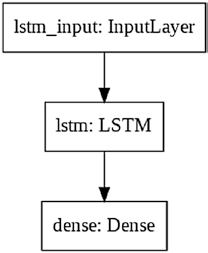

In [19]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


### Compiling and Training

In [20]:
rnn_model.compile(optimizer = 'adam', loss = 'mae')

In [21]:
EVALUATION_INTERVAL = 200
EPOCHS = 10
rnn_model.fit(train_data, epochs = EPOCHS,steps_per_epoch = EVALUATION_INTERVAL,validation_data = test_data,validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 7s 13ms/step - loss: 0.2700 - val_loss: 0.0787
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0629 - val_loss: 0.0650
Epoch 3/10
200/200 [==============================] - 6s 31ms/step - loss: 0.0529 - val_loss: 0.0597
Epoch 4/10
200/200 [==============================] - 17s 87ms/step - loss: 0.0504 - val_loss: 0.0560
Epoch 5/10
200/200 [==============================] - 9s 44ms/step - loss: 0.0486 - val_loss: 0.0529
Epoch 6/10
200/200 [==============================] - 3s 17ms/step - loss: 0.0478 - val_loss: 0.0519
Epoch 7/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0456 - val_loss: 0.0498
Epoch 8/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0444 - val_loss: 0.0509
Epoch 9/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0434 - val_loss: 0.0480
Epoch 10/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0422 - val_l

### Evaluation

- We call r2_score of sklearn_metrics to check the performance
score

In [22]:
rnn_predictions = rnn_model.predict(X_test)

rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model ="+"{:.4f}".format(rnn_score))

15/15 [==============================] - 1s 13ms/step
R2 Score of RNN model =0.6316


`R^2 - a coefficient of determination is a regression score. The best
possible score is 1.0. An R^2 score of 0.0 indicates that the model is
constant that always predicts the expected value of y, disregarding the
input features. In our case, the value is close to 1.0, and thus we can safely
assume that the model is well trained`

We will now plot the chart of actual values vs. the predicted values for
the entire testing dataset

In [23]:
#@title Data Range
# a = 0 #@param {type:"slider", min:0,max:12000, step:1}
# b = 12000 #@param {type:"slider", min:0,max:12000, step:1}
def plot_predictions(a,b,test, predicted, title):
    plt.figure(figsize = (16,4))
    plt.plot(test[a:b], color = 'blue',label ='Normalized power consumption')
    plt.plot(predicted[a:b], alpha = 0.7,color = 'orange',label = 'Predicted power consumption')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption')
    plt.legend()
    plt.show()
    

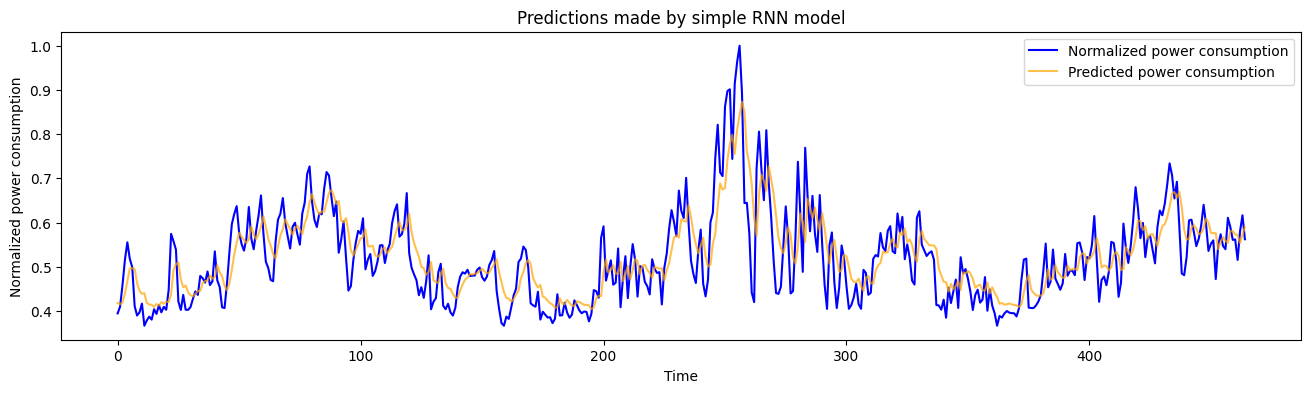

In [24]:
plot_predictions(0,12000,y_test, rnn_predictions,"Predictions made by simple RNN model")

We see that the predicted values are close to the actual values, meaning
the RNN model is performing well in predicting the energy consumption

### Let's zoom it a little bit

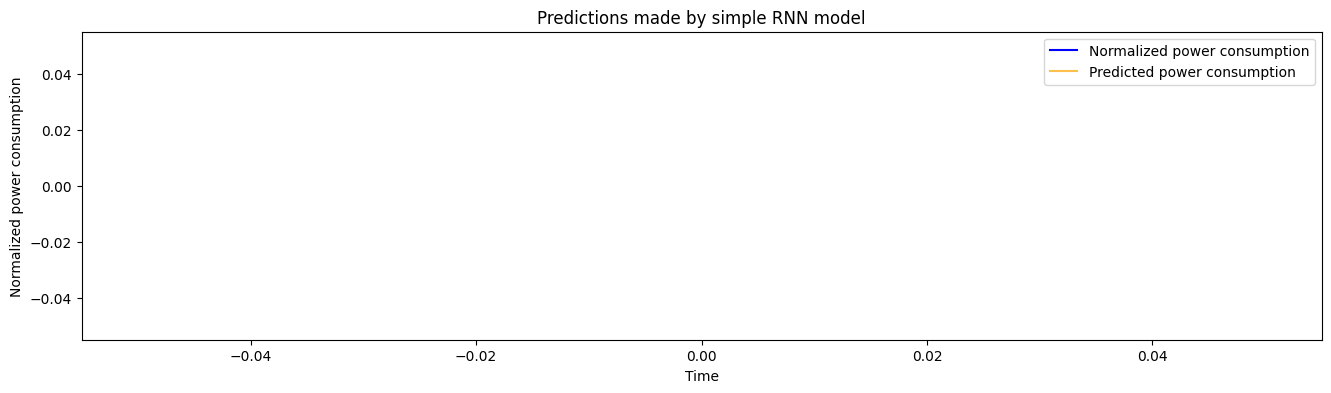

In [25]:
plot_predictions(3500,3550,y_test, rnn_predictions,"Predictions made by simple RNN model")

The prediction curve closely follows the expected target values. Thus,
we are assured that the model works even in smaller data ranges

You may zoom in on the end of the chart to see how the predictions

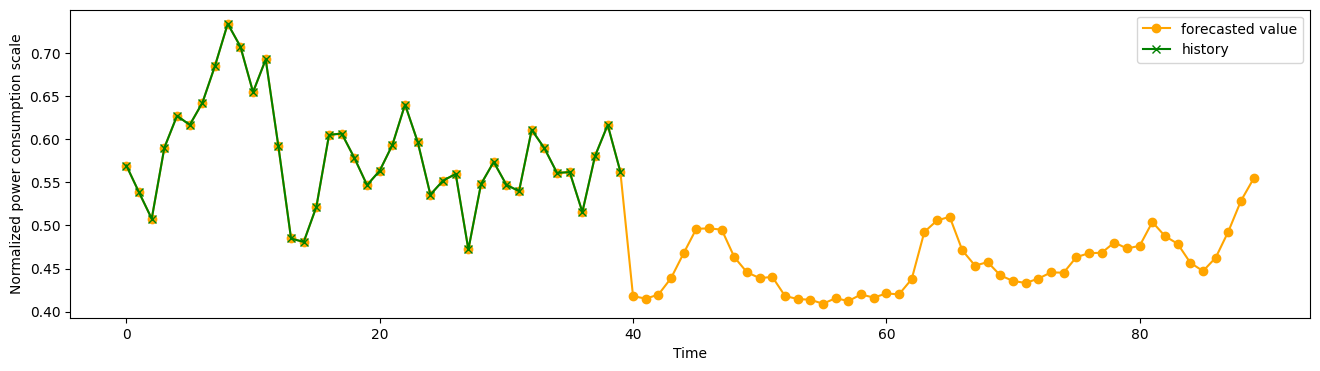

In [26]:
history_data = list(y_test[-40:])
flattened_predictions = [pred[0] for pred in rnn_predictions[:50]]
plottingvalues = list(history_data)+flattened_predictions
plt.figure(figsize = (16,4))
plt.plot(plottingvalues, color = 'orange',label = 'forecasted value',marker = 'o')
plt.plot(y_test[-40:], color = 'green',label = 'history',marker = 'x')
plt.xlabel('Time')
plt.ylabel('Normalized power consumption scale')
plt.legend()
plt.show()

### Predicting Next Data Point

- Now, we will use our model to predict the next data point. For this, we
extract the last data point from our test data and apply our predict function
on it.

In [27]:

X = X_test[-1:]
rnn_predictions1 = rnn_model.predict(X)

1/1 [==============================] - 0s 20ms/step


In [28]:
rnn_predictions1

array([[0.5900133]], dtype=float32)

This is the prediction made by our model for the timestamp 2018:08:03
01:00:00 hours, as the last data point that we have in our dataset is for the
timestamp 2018:08:03 00:00:00 hours

To visualize the result in a better way, I will generate a plot for the
last 40 data points along with the predicted value

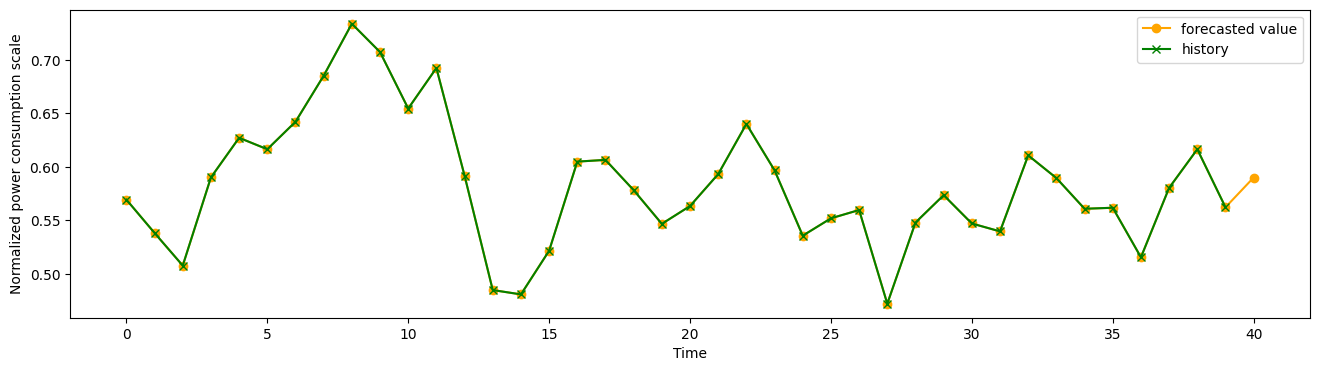

In [29]:
history_data = list(y_test[-40:])
flattened_predictions = [pred[0] for pred in rnn_predictions1[:50]]
plottingvalues = list(history_data)+flattened_predictions
plt.figure(figsize = (16,4))
plt.plot(plottingvalues, color = 'orange',
label = 'forecasted value',marker = 'o')
plt.plot(y_test[-40:], color = 'green',
label = 'history',marker = 'x')
plt.xlabel('Time')
plt.ylabel('Normalized power consumption scale')
plt.legend()
plt.show()

### Predicting Range of Data Points

In [30]:
df.iloc[-1]

DOM_MW    0.562202
Name: 2018-08-03 00:00:00, dtype: float64

- Typically, you would be interested in forecasting the power consumption
for a time range beyond the available data. Our last data point is of
2018:08:03 00:00:00 hours.
- Let us say that you would like to predict the next
25 data points
- This is like a multipart regression

- The trick for generating
these predictions is to use a single prediction as data for the next test set
and repeat the prediction for 25 times

In [31]:
history_data = list(y_test[-40:])

Then, we write a function to build a new dataset after adding the last
prediction to it

In [32]:
def make_data(X,rnn_predictions1):
    val = list(X[0][1:])+list(rnn_predictions1)
    X_new = []
    X_new.append(list(val))
    X_new = np.array(X_new)
    return X_new

We will create a list variable to store all our forecasts.

In [33]:
forecast = list()

We extract our last test data point as before to do the next data point
prediction.

In [34]:
X = X_test[-1:]

We now define a loop to create the test data, make a prediction on it,
and then add it to our forecast list

In [35]:
for i in range (25):
    X = make_data(X,rnn_predictions1)
    rnn_predictions1 = rnn_model.predict(X)
    forecast += list(rnn_predictions1)

1/1 [==============================] - 0s 31ms/step


Finally, we plot all data points consisting of our history data and the
next 25 predictions.

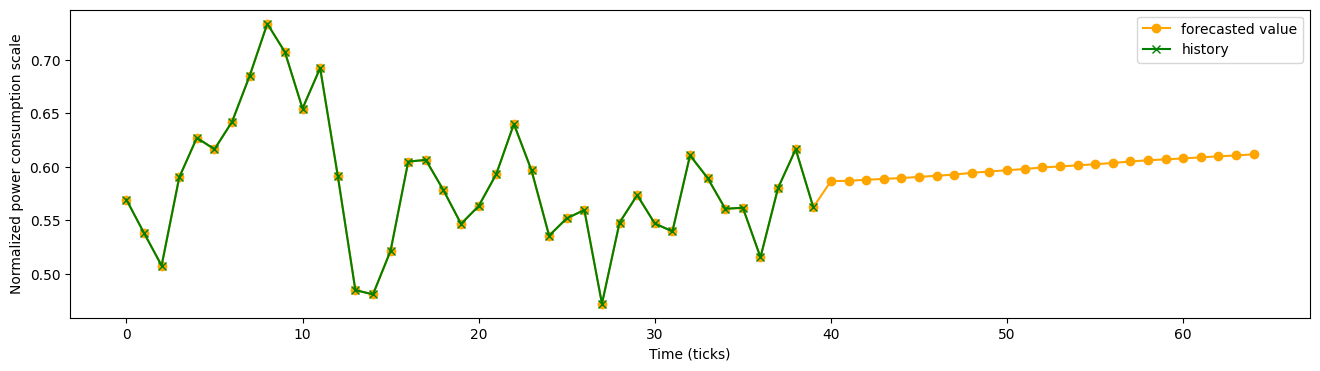

In [36]:
# Flatten forecast into a list of scalar values
flattened_forecast = [val[0] if isinstance(val, (np.ndarray, list)) else val for val in forecast]

# Combine history_data and flattened_forecast
plottingvalues = list(history_data) + flattened_forecast

# Plotting
plt.figure(figsize=(16, 4))
plt.plot(plottingvalues, color='orange', label='forecasted value', marker='o')
plt.plot(list(y_test[-40:]), color='green', label='history', marker='x')
plt.xlabel('Time (ticks)')
plt.ylabel('Normalized power consumption scale')
plt.legend()
plt.show()


- Okay, we are able to predict the energy consumption for the next few
hours. However, when you have the data covering the last 13 years, you
would be interested in predicting the consumption for the next one week
or next few more weeks. Using the technique of extrapolation 
used earlier may not do this job so good.
- We can now try training the
model on the daily data so that we can make predictions for the next 25
days by extrapolation.